In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
velocidade = [(10 + x*10) for x in range(8)]

In [3]:
viscosidade = [0.121, 0.139, 0.153, 0.159, 0.172, 0.172, 0.183, 0.185]

In [4]:
angle = math.radians(0.5)
velocidade_rad = np.array(velocidade) * ((2 * math.pi) / 60)
viscosidade3 = np.array(viscosidade)*1000
deform = np.array(velocidade) * ((2 * math.pi) / 60) / angle

In [5]:
df = pd.DataFrame({
    'Velocidade (rpm)':velocidade,
    'velocidade (rad/s)':velocidade_rad,
    'viscosidade (10**3)':viscosidade3,
    'Taxa de deformação (w/theta)':deform
})
df

,Velocidade (rpm),velocidade (rad/s),viscosidade (10**3),Taxa de deformação (w/theta)
0,10,1.047198,121.0,120.0
1,20,2.094395,139.0,240.0
2,30,3.141593,153.0,360.0
3,40,4.188790,159.0,480.0
4,50,5.235988,172.0,600.0
5,60,6.283185,172.0,720.0
6,70,7.330383,183.0,840.0
7,80,8.377580,185.0,960.0


In [6]:
xdic = {'X':np.log10(deform)}
ydic = {'Y':np.log10(viscosidade3)}

X = pd.DataFrame.from_dict(xdic)
Y = pd.DataFrame.from_dict(ydic)

x_SEQ = np.linspace(X.min(),X.max(),300).reshape(-1, 1)

value = 2 # grau do polinômio

polynomial_regression = make_pipeline(PolynomialFeatures(value),LinearRegression())
polynomial_regression.fit(X,Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

/home/ahpqmiranda/anaconda3/envs/ufpa_materiais/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


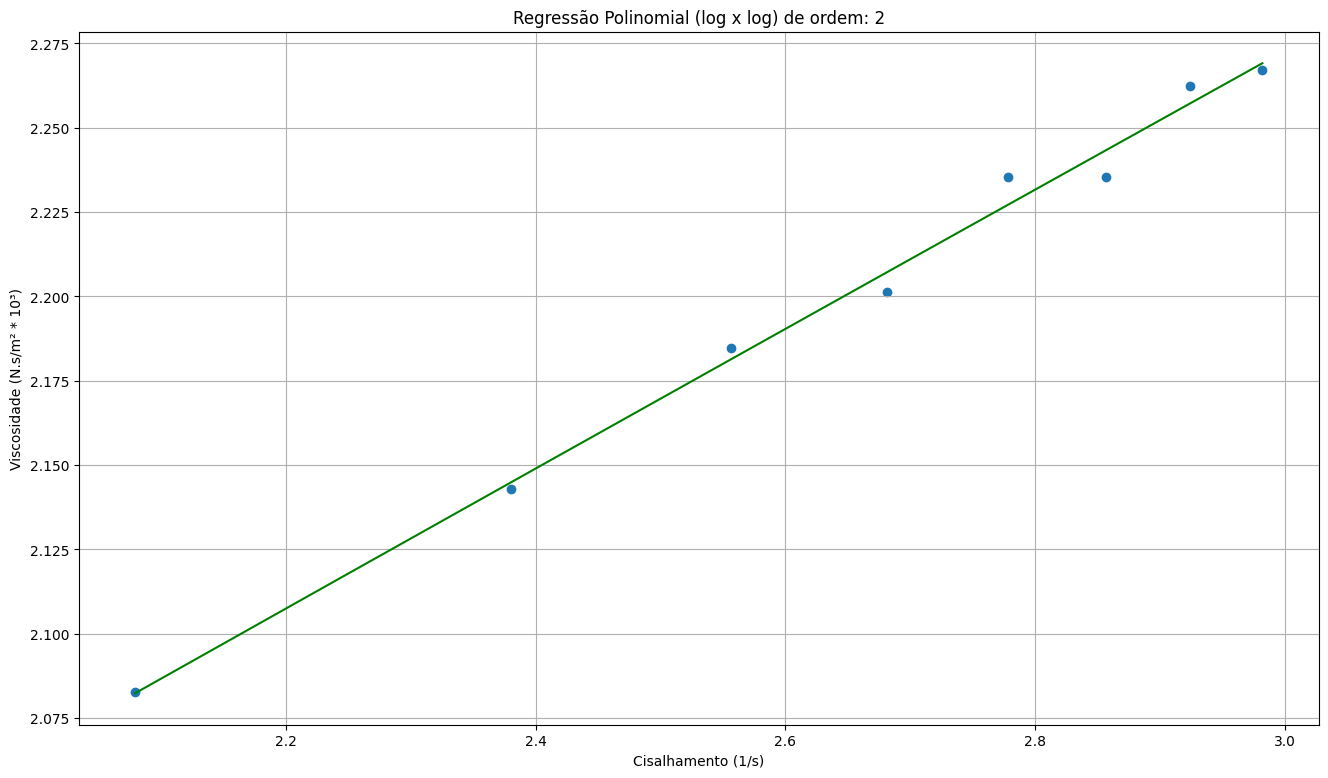

In [7]:
plt.figure(figsize=(16,9))
plt.scatter(X,Y)
plt.plot(x_SEQ, polynomial_regression.predict(x_SEQ),color='Green')
plt.title('Regressão Polinomial (log x log) de ordem: '+str(value))
plt.grid(True)
plt.xlabel("Cisalhamento (1/s)")
plt.ylabel("Viscosidade (N.s/m² * 10³)")
plt.show()

In [8]:
X = deform
Y = viscosidade

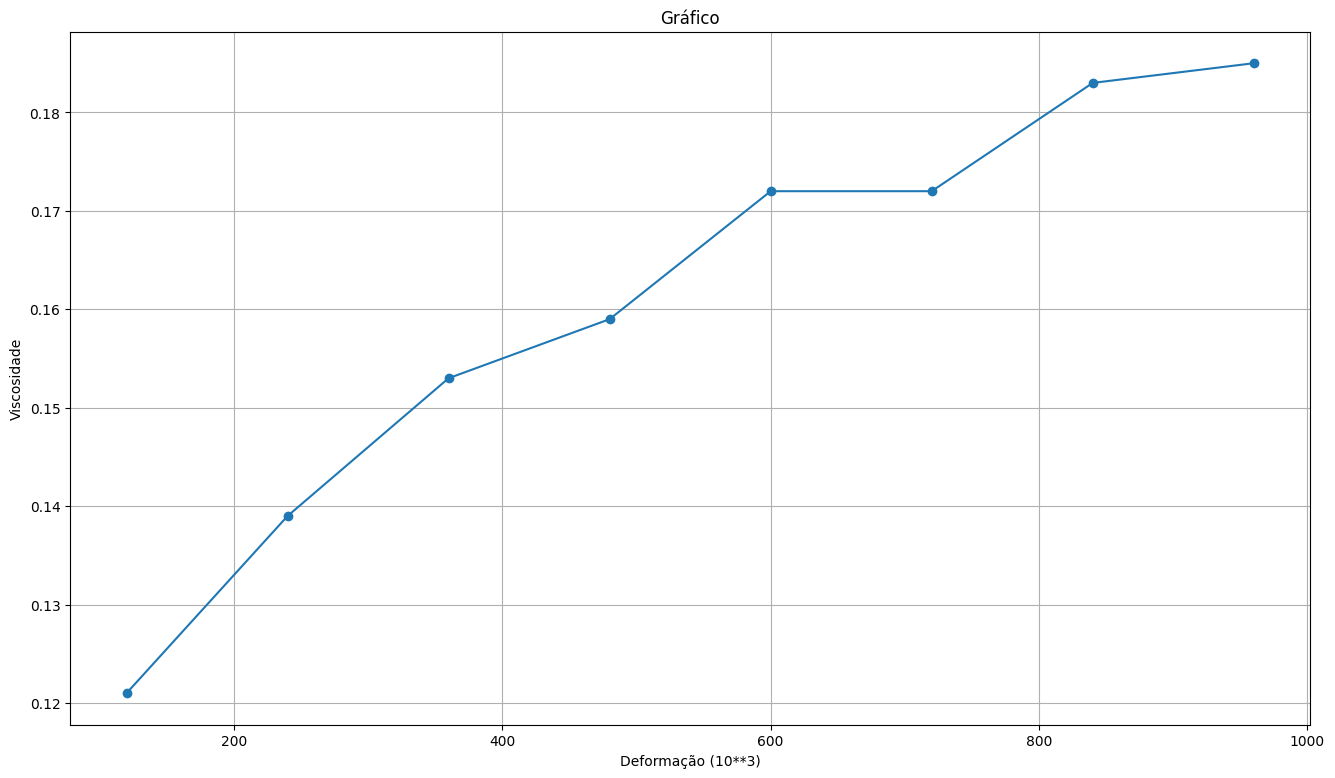

In [9]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X,Y,'-o')
ax.set_xlabel("Deformação (10**3)")
ax.set_ylabel("Viscosidade")
ax.set_title("Gráfico")
plt.grid(True)
plt.show()

In [10]:
datas_regression = pd.DataFrame({    'X': np.log10(deform),
    'Y': np.log10(viscosidade3),
    'XY': np.log10(deform) * np.log10(viscosidade3),
    'X2': np.log10(deform) * np.log10(deform)
    })


A = (len(deform) * sum(datas_regression.XY) - sum(datas_regression.Y) * sum(datas_regression.X))/(len(deform) * sum(datas_regression.X2) - (sum(datas_regression.X)**2))
# A é o coeficiente n-1, onde n vai ser 1.20676

B = (sum(datas_regression.X)*sum(datas_regression.XY) - sum(datas_regression.Y)*sum(datas_regression.X2))/((sum(datas_regression.X)**2) - len(deform) * sum(datas_regression.X2))
# B é o log10(k) * 10^3, logo k tem que ser 0.0449

In [11]:
print('Y = AX + B = {} * X + {}'.format(A, B))
print('convertendo da escala logarítmica para a escala real, temos:\n')

Y = AX + B = 0.2067677983524555 * X + 1.6526291587238753
convertendo da escala logarítmica para a escala real, temos:



In [12]:
n = A + 1
k = (10 ** B) / 1000
print('os coeficientes k:{:.4f} e n:{:.4f}'.format(k, n))

os coeficientes k:0.0449 e n:1.2068


In [13]:
print(f'Y={k:.3f}*X + {n:.3f}')

Y=0.045*X + 1.207
